In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

In [ ]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

In [ ]:
Data= pd.read_csv("CAvideos.csv")
Data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [ ]:
doublons=Data[Data.duplicated()]
print(doublons)


Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, description]
Index: []


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [ ]:
#supprimer les valeurs manquantes/nulles
data=Data.dropna()
data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [ ]:
data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [ ]:


# Convertir les dates en datetime
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
data['publish_time'] = pd.to_datetime(data['publish_time'])

# Extraire des fonctionnalités supplémentaires à partir de la date de publication
data['publish_year'] = data['publish_time'].dt.year
data['publish_month'] = data['publish_time'].dt.month
data['publish_day'] = data['publish_time'].dt.day
data['publish_hour'] = data['publish_time'].dt.hour

# Convertir les variables booléennes
data['comments_disabled'] = data['comments_disabled'].astype(int)
data['ratings_disabled'] = data['ratings_disabled'].astype(int)
data

C:\Users\pc\AppData\Local\Temp\ipykernel_15004\1691813064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
C:\Users\pc\AppData\Local\Temp\ipykernel_15004\1691813064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['publish_time'] = pd.to_datetime(data['publish_time'])
C:\Users\pc\AppData\Local\Temp\ipykernel_15004\1691813064.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_year,publish_month,publish_day,publish_hour
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,0,0,False,Eminem's new track Walk on Water ft. Beyoncé i...,2017,11,10,17
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,0,0,False,STill got a lot of packages. Probably will las...,2017,11,13,17
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,0,0,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,12,19
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,0,0,False,I know it's been a while since we did this sho...,2017,11,12,18
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,0,0,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017,11,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,0,0,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,2018,6,13,18
40877,8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,0,0,False,► Retrouvez vos programmes préférés : https://...,2018,6,13,19
40878,GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53+00:00,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,0,0,False,Find out more about Kingdom Hearts 3: https://...,2018,6,11,17
40879,lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,0,0,False,Peter Navarro isn’t talking so tough now. Ana ...,2018,6,13,4


In [ ]:
#supprimer la variables inutiles
data= data.drop(columns=['video_id','thumbnail_link'], axis=1)
data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_year,publish_month,publish_day,publish_hour
0,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,0,0,False,Eminem's new track Walk on Water ft. Beyoncé i...,2017,11,10,17
1,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,0,0,False,STill got a lot of packages. Probably will las...,2017,11,13,17
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,0,0,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,12,19
3,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,0,0,False,I know it's been a while since we did this sho...,2017,11,12,18
4,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,0,0,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017,11,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,0,0,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,2018,6,13,18
40877,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,0,0,False,► Retrouvez vos programmes préférés : https://...,2018,6,13,19
40878,2018-06-14,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53+00:00,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,0,0,False,Find out more about Kingdom Hearts 3: https://...,2018,6,11,17
40879,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,0,0,False,Peter Navarro isn’t talking so tough now. Ana ...,2018,6,13,4


In [ ]:
import spacy
# Charger le modèle spaCy
nlp = spacy.load("en_core_web_sm")

ModuleNotFoundError: No module named 'spacy'

In [ ]:
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

data['language'] = data['title'].apply(detect_language)


In [ ]:
#ne garder que les textes en englais
data = data[data['language'].isin(['en'])]

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W+', ' ', text)
    return text

data['cleaned'] = data['title'].apply(clean_text)
data

<ipython-input-52-e2464ea4a635>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned'] = data['title'].apply(clean_text)


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,language,cleaned
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,en,eminem walk on water audio ft beyoncé
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,False,False,False,STill got a lot of packages. Probably will las...,en,plush bad unboxing fan mail
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,en,racist superman rudy mancuso king bach lele pons
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,en,ed sheeran perfect official music video
5,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25.0,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699.0,103755.0,4613.0,12143.0,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,en,jake paul says alissa violet cheated with loga...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36937,18.26.05,3 Disturbing Snapchat/Snap Map Horror Stories,Mr. Nightmare,24.0,2018-05-24T17:43:28.000Z,"snapchat stories|""snapchat horror stories""|""fo...",340200.0,18843.0,232.0,2099.0,False,False,False,"Here are 3 more Snapchat horrors stories, with...",en,disturbing snapchat snap map horror stories
36939,18.26.05,Drake Duppy Freestyle (Kanye West & Pusha T Di...,WORLDSTARHIPHOP,10.0,2018-05-26T00:23:21.000Z,"world star hip hop|""worldstarhiphop""|""worldsta...",941422.0,47476.0,1719.0,10641.0,False,False,False,Listen to the official audio for Duppy Freesty...,en,drake duppy freestyle kanye west pusha t diss ...
36941,18.26.05,Golden State Warriors vs Houston Rockets Full ...,MLG Highlights,17.0,2018-05-25T03:38:05.000Z,"nba|""2018 nba playoffs""|""mlg highlights""|""mlg""...",3020870.0,17390.0,1239.0,5336.0,False,False,False,If you want to support my channel:https://www....,en,golden state warriors vs houston rockets full ...
36942,18.26.05,STRICT MOM GETS CALLED OUT,SSSniperWolf,24.0,2018-05-25T23:02:16.000Z,"sssniperwolf|""sniper wolf""|""reacting""|""reactio...",439019.0,28153.0,415.0,6454.0,False,False,False,STRICT MOM GETS CALLED OUT (ON DR PHIL)! Leave...,en,strict mom gets called out


In [ ]:
#suppression des mots vides
nltk.download('stopwords')
stop_words_en = set(stopwords.words('english'))

stemmer_en = SnowballStemmer('english')

def preprocess_text(text, lang):
    if lang == 'en':
        stop_words = stop_words_en
        stemmer = stemmer_en
    else:
        return text  # Ignore other languages for this example

    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['processed_comment'] = data.apply(lambda row: preprocess_text(row['title'], row['language']), axis=1)
data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-53-34f55b63973e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_comment'] = data.apply(lambda row: preprocess_text(row['title'], row['language']), axis=1)


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,language,cleaned,processed_comment
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,en,eminem walk on water audio ft beyoncé,eminem - walk on water (audio) ft. beyoncé
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,False,False,False,STill got a lot of packages. Probably will las...,en,plush bad unboxing fan mail,plush - bad unbox fan mail
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,en,racist superman rudy mancuso king bach lele pons,"racist superman | rudi mancuso, king bach & le..."
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,en,ed sheeran perfect official music video,ed sheeran - perfect (offici music video)
5,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25.0,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699.0,103755.0,4613.0,12143.0,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,en,jake paul says alissa violet cheated with loga...,jake paul say alissa violet cheat logan paul! ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36937,18.26.05,3 Disturbing Snapchat/Snap Map Horror Stories,Mr. Nightmare,24.0,2018-05-24T17:43:28.000Z,"snapchat stories|""snapchat horror stories""|""fo...",340200.0,18843.0,232.0,2099.0,False,False,False,"Here are 3 more Snapchat horrors stories, with...",en,disturbing snapchat snap map horror stories,3 disturb snapchat/snap map horror stori
36939,18.26.05,Drake Duppy Freestyle (Kanye West & Pusha T Di...,WORLDSTARHIPHOP,10.0,2018-05-26T00:23:21.000Z,"world star hip hop|""worldstarhiphop""|""worldsta...",941422.0,47476.0,1719.0,10641.0,False,False,False,Listen to the official audio for Duppy Freesty...,en,drake duppy freestyle kanye west pusha t diss ...,drake duppi freestyl (kany west & pusha t diss...
36941,18.26.05,Golden State Warriors vs Houston Rockets Full ...,MLG Highlights,17.0,2018-05-25T03:38:05.000Z,"nba|""2018 nba playoffs""|""mlg highlights""|""mlg""...",3020870.0,17390.0,1239.0,5336.0,False,False,False,If you want to support my channel:https://www....,en,golden state warriors vs houston rockets full ...,golden state warrior vs houston rocket full ga...
36942,18.26.05,STRICT MOM GETS CALLED OUT,SSSniperWolf,24.0,2018-05-25T23:02:16.000Z,"sssniperwolf|""sniper wolf""|""reacting""|""reactio...",439019.0,28153.0,415.0,6454.0,False,False,False,STRICT MOM GETS CALLED OUT (ON DR PHIL)! Leave...,en,strict mom gets called out,strict mom get call out


In [ ]:
#Ratio likes/views :
like_view_ratio= data['likes'] / data['views']
like_view_ratio


0        0.045891
1        0.125949
2        0.045758
4        0.048746
5        0.079220
           ...   
36937    0.055388
36939    0.050430
36941    0.005757
36942    0.064127
36946    0.062129
Length: 26061, dtype: float64

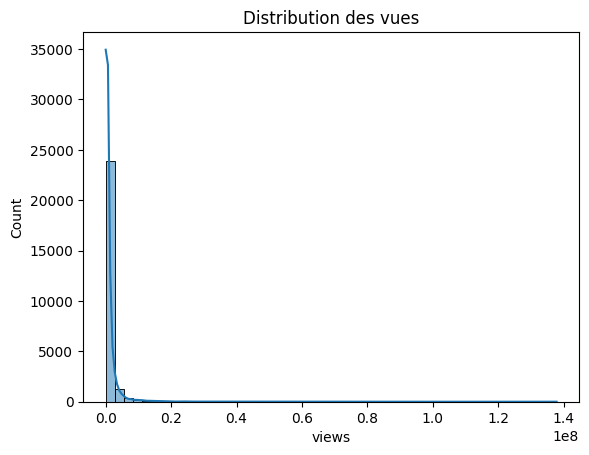

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des vues
sns.histplot(data['views'], bins=50, kde=True)
plt.title('Distribution des vues')
plt.show()


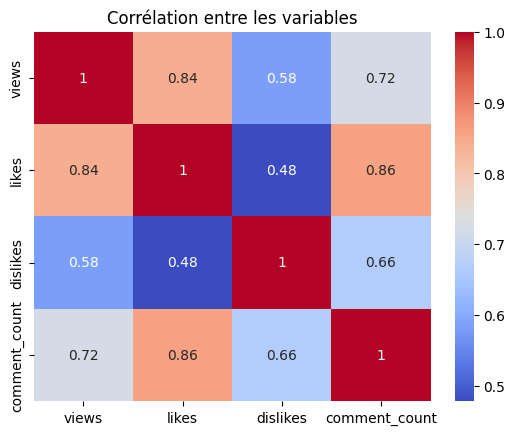

In [ ]:
#correlation entre les variables:
corr = data[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Corrélation entre les variables')
plt.show()


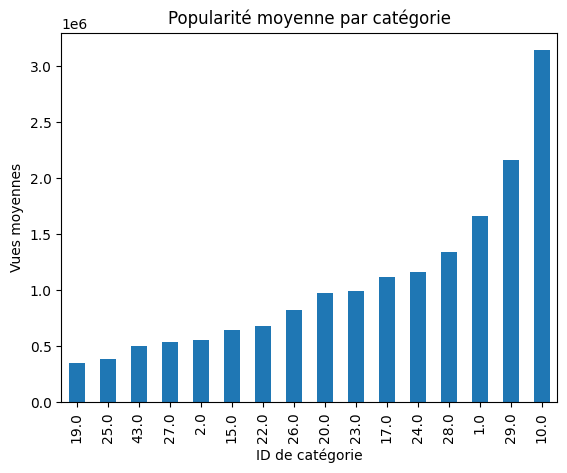

In [ ]:
#Popularité en fonction de la catégorie :
category_popularity = data.groupby('category_id')['views'].mean().sort_values()
category_popularity.plot(kind='bar')
plt.title('Popularité moyenne par catégorie')
plt.ylabel('Vues moyennes')
plt.xlabel('ID de catégorie')
plt.show()


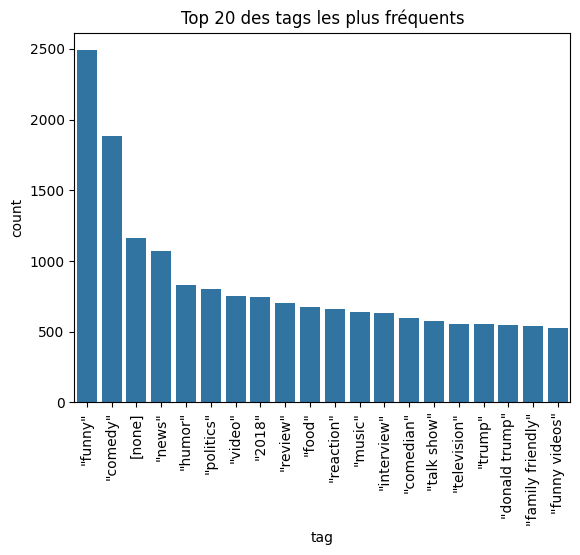

In [ ]:
#Impact des tags sur la popularité :
from collections import Counter
import itertools

all_tags = data['tags'].apply(lambda x: x.split('|')).tolist()
all_tags = list(itertools.chain.from_iterable(all_tags))
tag_counts = Counter(all_tags)
common_tags = tag_counts.most_common(20)

tag_data = pd.DataFrame(common_tags, columns=['tag', 'count'])
sns.barplot(x='tag', y='count', data=tag_data)
plt.title('Top 20 des tags les plus fréquents')
plt.xticks(rotation=90)
plt.show()


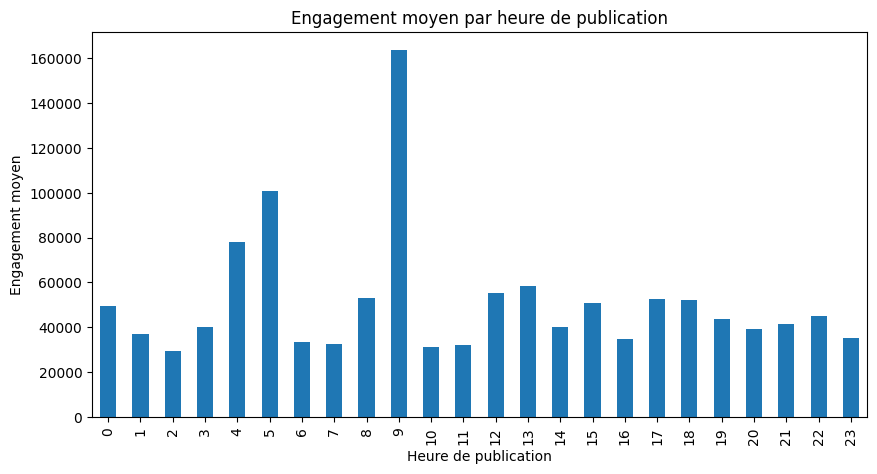

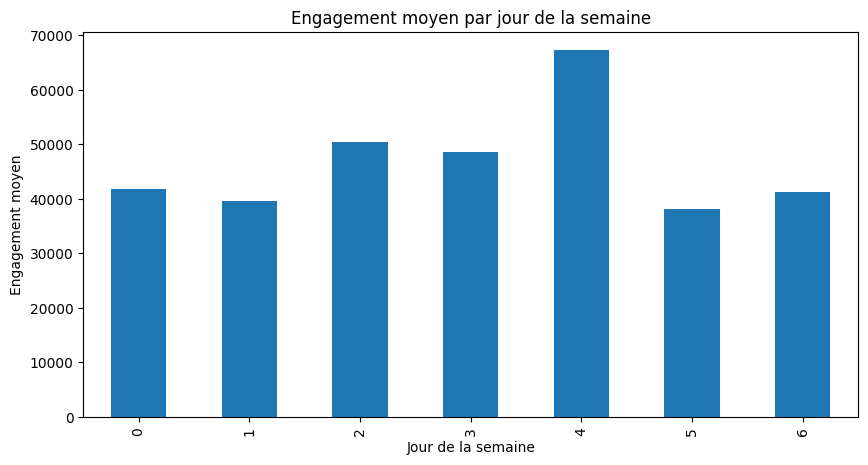

In [ ]:
# Convertir la colonne publish_time en datetime
data['publish_time'] = pd.to_datetime(data['publish_time'])

# Extraire l'heure et le jour de la semaine de la date de publication
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_dayofweek'] = data['publish_time'].dt.dayofweek

# Calculer l'engagement comme la somme des likes, dislikes et commentaires
data['engagement'] = data['likes'] + data['dislikes'] + data['comment_count']

# Analyser l'engagement moyen par heure de publication
engagement_by_hour = data.groupby('publish_hour')['engagement'].mean()
engagement_by_day = data.groupby('publish_dayofweek')['engagement'].mean()

# Visualiser les résultats
engagement_by_hour.plot(kind='bar', figsize=(10, 5), title='Engagement moyen par heure de publication')
plt.xlabel('Heure de publication')
plt.ylabel('Engagement moyen')
plt.show()

engagement_by_day.plot(kind='bar', figsize=(10, 5), title='Engagement moyen par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Engagement moyen')
plt.show()


In [ ]:
# Calculer les vues moyennes en fonction de comments_disabled
views_by_comments_disabled = data.groupby('comments_disabled')['views'].mean()
print("Vues moyennes en fonction de comments_disabled:")
print(views_by_comments_disabled)

# Calculer les vues moyennes en fonction de ratings_disabled
views_by_ratings_disabled = data.groupby('ratings_disabled')['views'].mean()
print("Vues moyennes en fonction de ratings_disabled:")
print(views_by_ratings_disabled)

# Calculer les vues moyennes en fonction de video_error_or_removed
views_by_video_error_or_removed = data.groupby('video_error_or_removed')['views'].mean()
print("Vues moyennes en fonction de video_error_or_removed:")
print(views_by_video_error_or_removed)


Vues moyennes en fonction de comments_disabled:
comments_disabled
False    1.159932e+06
True     1.347559e+06
Name: views, dtype: float64
Vues moyennes en fonction de ratings_disabled:
ratings_disabled
False    1.160733e+06
True     1.423314e+06
Name: views, dtype: float64
Vues moyennes en fonction de video_error_or_removed:
video_error_or_removed
False    1.162469e+06
True     1.401388e+06
Name: views, dtype: float64


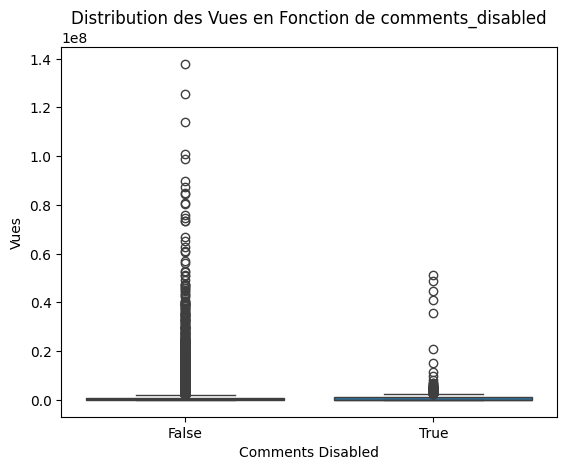

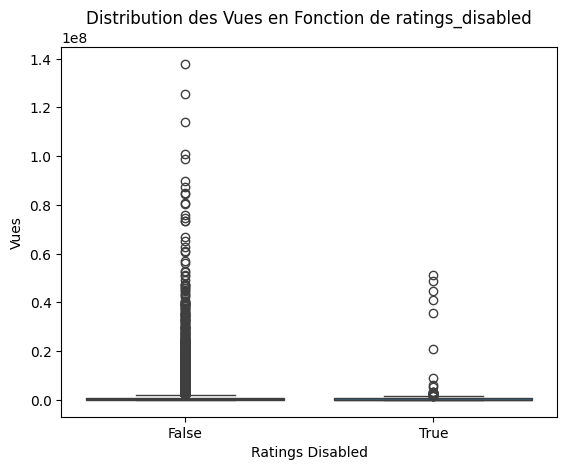

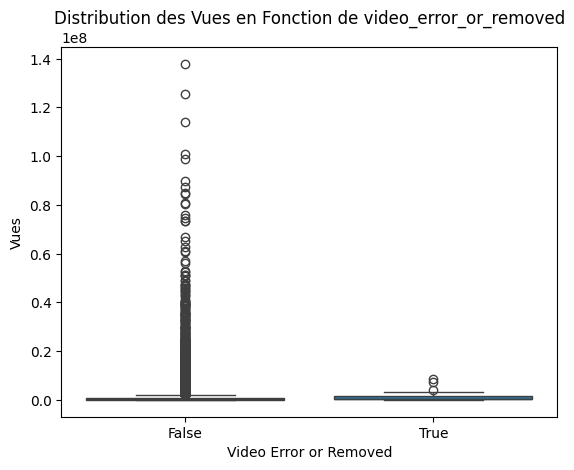

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualiser la distribution des vues en fonction de comments_disabled
sns.boxplot(x='comments_disabled', y='views', data=data)
plt.title('Distribution des Vues en Fonction de comments_disabled')
plt.xlabel('Comments Disabled')
plt.ylabel('Vues')
plt.show()

# Visualiser la distribution des vues en fonction de ratings_disabled
sns.boxplot(x='ratings_disabled', y='views', data=data)
plt.title('Distribution des Vues en Fonction de ratings_disabled')
plt.xlabel('Ratings Disabled')
plt.ylabel('Vues')
plt.show()

# Visualiser la distribution des vues en fonction de video_error_or_removed
sns.boxplot(x='video_error_or_removed', y='views', data=data)
plt.title('Distribution des Vues en Fonction de video_error_or_removed')
plt.xlabel('Video Error or Removed')
plt.ylabel('Vues')
plt.show()


Utiliser TF-IDF pour convertir les descriptions en représentations numériques.

In [ ]:
# Nettoyer la colonne de description
#Nettoyer le texte dans la colonne description en supprimant les caractères spéciaux et en convertissant tout en minuscules
import re

def clean_text(text):
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r'\d+', '', text)  # Supprimer les chiffres
    text = re.sub(r'\s+', ' ', text)  # Supprimer les espaces multiples
    text = re.sub(r'[^\w\s]', '', text)  # Supprimer les caractères spéciaux
    return text

data['clean_description'] = data['description'].apply(lambda x: clean_text(str(x)))

print(data['clean_description'].head())


0    eminems new track walk on water ft beyoncé is ...
1    still got a lot of packages probably will last...
2    watch my previous video  nnsubscribe  httpswww...
3    i know its been a while since we did this show...
4     httpsadgtytperfectn httpsatlanticrytalbumnsub...
Name: clean_description, dtype: object


Examiner la relation entre les descriptions vectorisées et les vues.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialiser le vectoriseur TF-IDF
tfidf = TfidfVectorizer(max_features=1000)  # Limiter le nombre de caractéristiques pour simplifier

# Appliquer TF-IDF à la colonne clean_description
tfidf_matrix = tfidf.fit_transform(data['clean_description'])

# Convertir la matrice TF-IDF en DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

print(tfidf_df.head())


   about  access  achievement  across  act  action  actually  adam  add  \
0    0.0     0.0          0.0     0.0  0.0     0.0       0.0   0.0  0.0   
1    0.0     0.0          0.0     0.0  0.0     0.0       0.0   0.0  0.0   
2    0.0     0.0          0.0     0.0  0.0     0.0       0.0   0.0  0.0   
3    0.0     0.0          0.0     0.0  0.0     0.0       0.0   0.0  0.0   
4    0.0     0.0          0.0     0.0  0.0     0.0       0.0   0.0  0.0   

   adventure  ...  youtube  youve  البيت  الحلقة  الكبير  على  فويس   في  \
0        0.0  ...      0.0    0.0    0.0     0.0     0.0  0.0   0.0  0.0   
1        0.0  ...      0.0    0.0    0.0     0.0     0.0  0.0   0.0  0.0   
2        0.0  ...      0.0    0.0    0.0     0.0     0.0  0.0   0.0  0.0   
3        0.0  ...      0.0    0.0    0.0     0.0     0.0  0.0   0.0  0.0   
4        0.0  ...      0.0    0.0    0.0     0.0     0.0  0.0   0.0  0.0   

   مسلسل   من  
0    0.0  0.0  
1    0.0  0.0  
2    0.0  0.0  
3    0.0  0.0  
4    0.0  0.

In [ ]:
# Ajouter les vues au DataFrame TF-IDF
tfidf_df['views'] = data['views']

# Calculer les corrélations
correlations = tfidf_df.corr()['views'].sort_values(ascending=False)

print("Corrélations entre les caractéristiques TF-IDF et les vues:")
print(correlations.head(20))  # Afficher les 20 mots les plus corrélés avec les vues


Corrélations entre les caractéristiques TF-IDF et les vues:
views        1.000000
caller       0.024902
live         0.023177
crew         0.021788
baby         0.021513
ok           0.020881
stream       0.020405
universe     0.018340
street       0.018153
sunday       0.017958
toronto      0.017540
sony         0.016867
right        0.016033
feat         0.015250
community    0.015237
drama        0.015037
style        0.015019
blue         0.014995
hours        0.014783
dramas       0.014663
Name: views, dtype: float64


In [ ]:
# Filtrer les vidéos avec des commentaires désactivés
videos_with_comments_disabled = data[data['comments_disabled'] == True]

# Recommander d'activer les commentaires
print("Recommandez d'activer les commentaires pour les vidéos suivantes:")
print(videos_with_comments_disabled[[ 'title', 'channel_title']])


Recommandez d'activer les commentaires pour les vidéos suivantes:
                                                   title  \
70            The National for Sunday, November 12, 2017   
82     Will Grace Davies make you love her? | Live Sh...   
383    The National for Monday November 13, 2017 - Ki...   
385         Week 4 Challenge: Check out “My Email Leads”   
466    What ‘Dr. Phil’ Team Discovers In Kenya When S...   
...                                                  ...   
36405  Prince Harry pays tribute to Charles on his 70...   
36461      Stephen Fry on Trump, the monarchy and Canada   
36464  Gruffydd wows with OUT OF THIS WORLD vocals an...   
36549  Man Confronts Wife About Spending Hours With O...   
36770  'You Don’t Put Words In My Mouth,' Dr. Phil Te...   

                channel_title  
70               The National  
82            The X Factor UK  
383              The National  
385                CREA | ACI  
466         The Dr. Phil Show  
...                  

Répondre aux commentaires :

Encourager les créateurs de contenu à répondre aux commentaires pour augmenter l'engagement. Vous pouvez surveiller les vidéos avec des commentaires désactivés et leur rappeler d'activer cette fonctionnalité.

In [ ]:
#Minimiser les Risques de Vidéos Retirées ou avec Erreurs
# Filtrer les vidéos avec des commentaires ou des évaluations désactivés
problematic_videos = data[(data['comments_disabled'] == True) | (data['ratings_disabled'] == True)]

# Recommander de respecter les politiques de YouTube
print("Recommandez de vérifier les politiques de YouTube pour les vidéos suivantes:")
print(problematic_videos[['title', 'channel_title']])


Recommandez de vérifier les politiques de YouTube pour les vidéos suivantes:
                                                   title  \
67               Drako - Watch Me Do It [Official Video]   
70            The National for Sunday, November 12, 2017   
82     Will Grace Davies make you love her? | Live Sh...   
383    The National for Monday November 13, 2017 - Ki...   
385         Week 4 Challenge: Check out “My Email Leads”   
...                                                  ...   
36461      Stephen Fry on Trump, the monarchy and Canada   
36464  Gruffydd wows with OUT OF THIS WORLD vocals an...   
36549  Man Confronts Wife About Spending Hours With O...   
36577  Hawaii's Big Island Evacuation On Alert As Kil...   
36770  'You Don’t Put Words In My Mouth,' Dr. Phil Te...   

                channel_title  
67          babygranderecords  
70               The National  
82            The X Factor UK  
383              The National  
385                CREA | ACI  
...       

surveiller les vidéos retirées ou avec erreurs :

Vous pouvez surveiller les vidéos qui ont des commentaires ou des évaluations désactivés pour identifier les problèmes potentiels.